<a href="https://colab.research.google.com/github/vishnuvryeruva/Image-Classification-and-Gradient-Descent/blob/main/Blackbox_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOTA using CNN

In [1]:
! [ -e /content ] && pip install -Uqq fastai 

     |████████████████████████████████| 189 kB 5.7 MB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.5 MB/s 
     |████████████████████████████████| 1.2 MB 33.6 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 51 kB 300 kB/s 
Mounted at /content/gdrive


**CNN Learner**

In [3]:
from fastbook import *

In [4]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.166491,0.015540,0.005413,01:42


epoch,train_loss,valid_loss,error_rate,time
0,0.047309,0.012341,0.003383,02:21


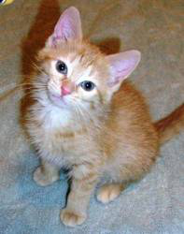

In [5]:
img = PILImage.create(image_cat())
img.to_thumb(208)
img.to_thumb(234)

In [6]:
uploader = SimpleNamespace(data = ['/content/gdrive/MyDrive/Data/cat_dt.png'])

In [7]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


Segmentation

In [8]:
path = untar_data(URLs.CAMVID_TINY) # camvid dataset
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)
learn = unet_learner(dls, resnet34)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.704526,5.324638,00:04


epoch,train_loss,valid_loss,time
0,2.087091,1.408735,00:05


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


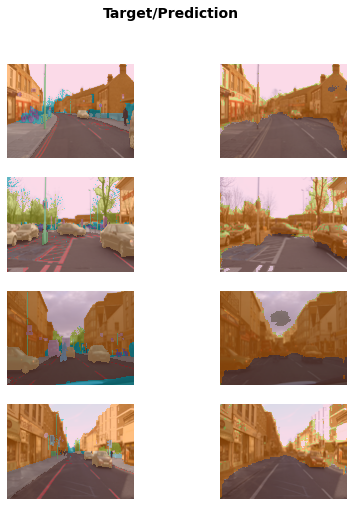

In [9]:
learn.show_results(max_n=4, figsize=(7,8))

Sentiment Analysis

In [10]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.467965,0.405352,0.819360,12:22


epoch,train_loss,valid_loss,accuracy,time
0,0.271748,0.219267,0.914200,22:36


In [11]:
learn.predict("I really liked that movie!")

('pos', TensorText(1), TensorText([0.0823, 0.9177]))

Tabular Learner

In [12]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [13]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.369417,0.358310,0.836149,00:05


Collab Learner

In [14]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.0))
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,time
0,1.989971,1.968250,00:00


In [15]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,72.0,68.0,3.0,2.777219
1,20.0,1.0,3.0,2.792003
2,89.0,12.0,3.0,2.772485
3,34.0,77.0,4.0,2.805686
4,98.0,14.0,5.0,2.794211
5,79.0,29.0,4.5,2.819319
6,17.0,10.0,3.0,2.761098
7,62.0,52.0,5.0,2.790940
8,73.0,31.0,4.0,2.773355


**REFERENCES**

https://github.com/LeanManager/PyTorch_Image_Classifier/blob/master/Image_Classifier_Project.ipynb

https://github.com/TannerGilbert/Tutorials/blob/master/FastAI/Animal%20detector%20from%20Google%20images.ipynb

https://github.com/TannerGilbert/FastAI-Code-Collection/blob/v1/Image_segmentation_on_CamVid_dataset.ipynb

https://github.com/fastai/fastbook/blob/master/01_intro.ipynb

https://www.youtube.com/watch?v=mWSrzJ-jANM&t=156s&ab_channel=GilbertTanner

https://www.youtube.com/watch?v=X6vqwM15tl8&t=75s&ab_channel=GilbertTanner

https://www.youtube.com/watch?v=pR9gqcYAG-c&ab_channel=GilbertTanner

https://www.youtube.com/watch?v=Svz02ezIbnE&ab_channel=GilbertTanner

https://www.youtube.com/watch?v=IPXr_L4qdEg&ab_channel=GilbertTanner